In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
pi = math.pi

In [3]:
def matlab_style_gauss2D(shape=(3,3),sigma=0.5):
    """
    2D gaussian mask - should give the same result as MATLAB's
    fspecial('gaussian',[shape],[sigma])
    """
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

def matlab_style_log2D(shape=(3,3),sigma=0.5):
    """
    2D gaussian mask - should give the same result as MATLAB's
    fspecial('gaussian',[shape],[sigma])
    """
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    h1 = h*(x*x + y*y - 2.*sigma*sigma)/(sigma*sigma**2)
    h = h1 - sum(h1)/(shape[0]*shape[1])  
    return h

In [4]:
#function f=makefilter(scale,phasex,phasey,pts,sup)
#  gx=gauss1d(3*scale,0,pts(1,:),phasex);
#  gy=gauss1d(scale,0,pts(2,:),phasey);
#  f=normalise(reshape(gx.*gy,sup,sup));
#return
def makefilter(scale,phasex,phasey,pts,sup):
    gx=gauss1d(3*scale,0,pts[0,:],phasex);
    gy=gauss1d(scale,0,pts[1,:],phasey);
    f=normalise(np.reshape(gx*gy,(sup-1,sup-1)));
    return f

In [5]:
#function g=gauss1d(sigma,mean,x,ord)
#% Function to compute gaussian derivatives of order 0 <= ord < 3
#% evaluated at x.
#  x=x-mean;num=x.*x;
#  variance=sigma^2;
#  denom=2*variance; 
#  g=exp(-num/denom)/sqrt(pi*denom);
#  switch ord,
#    case 1, g=-g.*(x/variance);
#    case 2, g=g.*((num-variance)/(variance^2));
#  end;
#return
def gauss1d(sigma,mean,x,ord):
  x=x-mean
  num=x*x
  variance=sigma**2
  denom=2*variance
  g=np.exp(-num/denom)/np.sqrt(pi*denom)
  if (ord ==1):
    g=-g*(x/variance)
  elif (ord == 2):
    g=g*((num-variance)/(variance^2));
  return g

In [6]:
#function f=normalise(f), f=f-mean(f(:)); f=f/sum(abs(f(:))); return
def normalise(f):
    f = f-np.mean(f)
    f = f/np.sum(np.abs(f))
    return f

In [7]:
#  SUP=49;                 % Support of the largest filter (must be odd)
#  SCALEX=[1,2,4];         % Sigma_{x} for the oriented filters
#  NORIENT=6;              % Number of orientations
#  NROTINV=2;
#  NBAR=length(SCALEX)*NORIENT;
#  NEDGE=length(SCALEX)*NORIENT;
#  NF=NBAR+NEDGE+NROTINV;
#  F=zeros(SUP,SUP,NF);
#  hsup=(SUP-1)/2;
sup = 12
scalex = np.array([1,2])
norient =4
nrotinv = 2
nbar=len(scalex)*norient
nedge=len(scalex)*norient
nf=nbar+nedge+nrotinv
f = np.zeros([sup-1,sup-1,nf])
hsup = (sup-1)/2;

In [8]:
#  [x,y]=meshgrid([-hsup:hsup],[hsup:-1:-hsup]);
#  orgpts=[x(:) y(:)]';
xin = np.arange(-hsup, hsup, 1)
yin = np.arange(hsup,-hsup,-1)
x,y = np.meshgrid(xin,yin)
orgpts=np.array([x, y])
orgpts = np.reshape(orgpts,(2,(sup-1)**2))  ######needs work...



In [9]:
#  count=1;
#  for scale=1:length(SCALEX),
#    for orient=0:NORIENT-1,
#      angle=pi*orient/NORIENT;  % Not 2pi as filters have symmetry
#      c=cos(angle);s=sin(angle);
#      rotpts=[c -s;s c]*orgpts;
#      F(:,:,count)=makefilter(SCALEX(scale),0,1,rotpts,SUP);
#      F(:,:,count+NEDGE)=makefilter(SCALEX(scale),0,2,rotpts,SUP);
#      count=count+1;
#    end;
#  end; 

count=0
for scale  in range( len(scalex)):
    for orient in range(norient):
        angle=math.pi*orient/norient;  #Not 2pi as filters have symmetry
        c=math.cos(angle)
        s=math.sin(angle)      
        rotpts=np.matmul(np.array([[c, -s],[s, c]]),orgpts)
        f[:,:,count]=makefilter(scalex[scale],0,1,rotpts,sup)
        f[:,:,count+nedge]=makefilter(scalex[scale],0,2,rotpts,sup)
        count = count+1

       

In [10]:
#  F(:,:,NBAR+NEDGE+1)=normalise(fspecial('gaussian',SUP,10));
#  F(:,:,NBAR+NEDGE+2)=normalise(fspecial('log',SUP,10));

f[:,:,nbar+nedge]=normalise(matlab_style_gauss2D((sup-1,sup-1),10))
f[:,:,nbar+nedge+1]=normalise(matlab_style_log2D((sup-1,sup-1),10))
        


In [11]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
import cv2
import numpy as np
%matplotlib inline

fig, axs = plt.subplots(6,8, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(38):
    axs[i].axis('off')
    axs[i].imshow(f[:,:,i])
    axs[i].set_title(i)

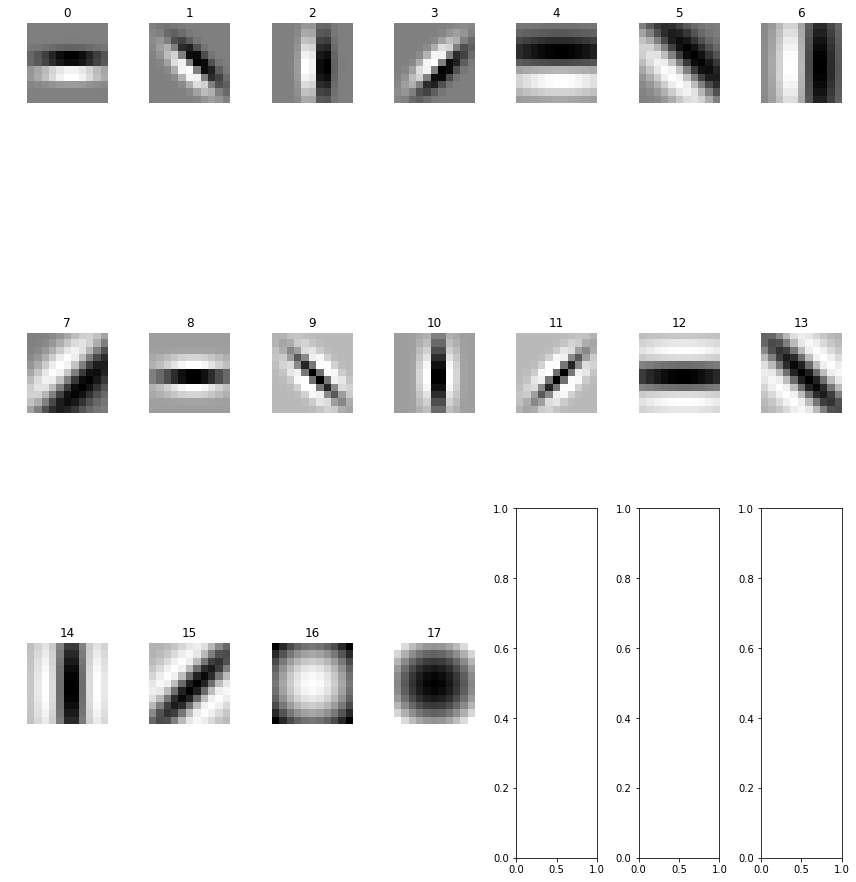

In [12]:
def plot_figures(figures, nrows = 1, ncols=1, labels=None):
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12, 14))
    axs = axs.ravel()
    for index, title in zip(range(len(figures)), figures):
        axs[index].imshow(figures[title], plt.gray())
        if(labels != None):
           axs[index].set_title(labels[index])
        else:
            axs[index].set_title(title)
            
        axs[index].set_axis_off()
        
    plt.tight_layout()

figures = {}
labels = {}
my_signs = []
index = 0
for i in range(18):
    #img = cv2.cvtColor(cv2.imread(my_image), cv2.COLOR_BGR2RGB)
    #my_signs.append(f[:,:,i])
    figures[index] = f[:,:,i]
    #labels[index] = name_values[my_labels[index]][1].decode('ascii')
    index += 1

plot_figures(figures, 3, 7)


# Load pickled data
import pickle
import numpy as np
# TODO: Fill this in based on where you saved the training and testing data



### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

import random
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

index = random.randint(0, len(X_train))

image = X_train[index].squeeze()
#img=cv2.cvtColor(image,cv2.COLOR_BGRA2BGR)[:, :, np.newaxis]
print(image.shape)


#image = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
#plt.figure(figsize=(15,5))
plt.imshow(image)
#plt.imshow(img)



index = random.randint(0, len(X_train))
image = X_train[index].squeeze()
img = image
kernel = np.ones((5,5),np.float32)/25

dst = cv2.filter2D(img,-1,f[:,:,1])

plt.subplot(131),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(f[:,:,1]),plt.title('filter')
plt.xticks([]), plt.yticks([])
plt.show()

In [13]:
fh = open("tiny-imagenet-200/wnids.txt")
count = 0
yval = []
for line in fh:
    nl = ''
    for e in line:
        if e == '\n':
            break
        else:
            nl = nl+e
    yval.append(nl)
    #print(line)
    count+=1
fh.close()
print(count)


os.chdir('tiny-imagenet-200/train')
#list of folders
t2 = os.listdir()
#yval of list


cwd = os.getcwd()

#gets all x values... need to make y[200] oneshot array
#change t2[:10] for all pics and change x size
size = 5000
class_size = 10

x = np.zeros([size,64,64,3], dtype='uint8')
y = np.zeros([size,class_size])
c = 0
c2 = 0
for d in t2[:10]:
    #print(d)
    
    for f2 in os.listdir(d+'/images'):
        x[c,:,:,:]=cv2.imread(cwd+'\\'+d+'\\images\\'+f2)
        y[c,c2] = 1
        c = c+1
        
    c2+=1   
        
        #print(f2)

200


In [14]:
from sklearn.utils import shuffle

n_classes = class_size
print(y.shape)
print(x.shape)
x, y = shuffle(x, y)

(5000, 10)
(5000, 64, 64, 3)


[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]


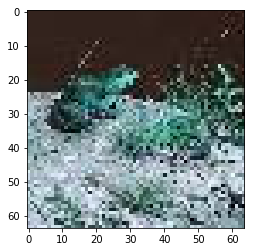

In [15]:
r = 6
dst = cv2.filter2D(x[r],-1,f[:,:,1])
#plt.imshow(f[:,:,1])
plt.imshow(x[r])
print(y[r])

In [16]:
from sklearn.utils import shuffle



#X_test = np.sum(X_test/3, axis=3, keepdims=True)
def preprocess(img):
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_out= img.astype('float32')
    #img_out=(img_out-img_out.mean())/img_out.std()
    img_out=img_out/255
    

    return img_out

x= preprocess(x)
#X_valid, y_valid = preprocess(X_valid, y_valid)
#X_test, y_test = preprocess(X_test, y_test)

z = 0
figures = np.empty([5000,64,64,54], dtype='float32')
for image in x:    
    
    
    
    for i in range(18):
        figures[z,:,:,i*3:i*3+3] =  cv2.filter2D(image,-1,f[:,:,i])
        
        #figur =  cv2.filter2D(image,-1,f[:,:,i])
        
    z=z+1
  


In [17]:

import pandas as pd
from time import time


import tensorflow as tf
import keras
import keras.layers as layers
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.callbacks import TensorBoard


Using TensorFlow backend.


In [18]:
model = keras.Sequential()

model.add(layers.Conv2D(filters=54, kernel_size=(3, 3), activation='relu', padding='same',input_shape=(64,64,3)))
model.add(layers.MaxPooling2D())
#model.add(layers.AveragePooling2D(input_shape=(32,32,12)))

model.add(layers.Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))

#model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))

#model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same',activation='relu'))

model.add(layers.MaxPooling2D())

model.add(layers.Flatten())

model.add(layers.Dropout(0.25))

#model.add(layers.Dense(units=4096, activation='relu'))

model.add(layers.Dense(units=4096, activation='relu'))

model.add(layers.Dense(units=2048, activation='relu'))

model.add(layers.Dense(units=class_size, activation = 'softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 54)        1512      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 54)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       172928    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 256)       295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 256)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
__________

In [19]:
model2 = keras.Sequential()

#model2.add(layers.Conv2D(filters=54, kernel_size=(3, 3), activation='relu', input_shape=(64,64,3)))
model2.add(layers.MaxPooling2D(input_shape=(64,64,54)))
#model.add(layers.AveragePooling2D(input_shape=(32,32,12)))

model2.add(layers.Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model2.add(layers.MaxPooling2D())

model2.add(layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))

#model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))

#model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same',activation='relu'))

model2.add(layers.MaxPooling2D())

model2.add(layers.Flatten())

model2.add(layers.Dropout(0.25))

#model.add(layers.Dense(units=4096, activation='relu'))

model2.add(layers.Dense(units=4096, activation='relu'))

model2.add(layers.Dense(units=2048, activation='relu'))

model2.add(layers.Dense(units=class_size, activation = 'softmax'))

model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 54)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 128)       172928    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 256)       295168    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 256)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12544)             0         
__________

In [20]:
model2.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
EPOCHS = 10
BATCH_SIZE = 128

In [21]:
#tensorboard = TensorBoard(log_dir="logs/{}".format(time()))
#model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=EPOCHS, 
#                    validation_data=validation_generator, validation_steps=validation_steps, 
#                    shuffle=True, callbacks=[tensorboard])


In [22]:

m2 = model2.fit(figures, y,  epochs=10)


Epoch 1/10
5000/5000 [==============================] - 20s 4ms/step - loss: 2.1352 - acc: 0.1940
Epoch 2/10
5000/5000 [==============================] - 17s 3ms/step - loss: 1.8458 - acc: 0.3424
Epoch 3/10
5000/5000 [==============================] - 17s 3ms/step - loss: 1.6918 - acc: 0.3976
Epoch 4/10
5000/5000 [==============================] - 17s 3ms/step - loss: 1.5268 - acc: 0.4664
Epoch 5/10
5000/5000 [==============================] - 17s 3ms/step - loss: 1.3364 - acc: 0.5306
Epoch 6/10
5000/5000 [==============================] - 17s 3ms/step - loss: 1.1237 - acc: 0.6098
Epoch 7/10
5000/5000 [==============================] - 17s 3ms/step - loss: 0.8440 - acc: 0.7088
Epoch 8/10
5000/5000 [==============================] - 17s 3ms/step - loss: 0.5198 - acc: 0.8252
Epoch 9/10
5000/5000 [==============================] - 16s 3ms/step - loss: 0.3293 - acc: 0.8912
Epoch 10/10
5000/5000 [==============================] - 16s 3ms/step - loss: 0.2501 - acc: 0.9248


In [23]:
#model2.evaluate(figures2, y_test)

In [24]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
m= model.fit(x, y, epochs=10)

Epoch 1/10
5000/5000 [==============================] - 16s 3ms/step - loss: 2.2029 - acc: 0.1860
Epoch 2/10
5000/5000 [==============================] - 15s 3ms/step - loss: 1.8988 - acc: 0.3044
Epoch 3/10
5000/5000 [==============================] - 15s 3ms/step - loss: 1.7508 - acc: 0.3678
Epoch 4/10
5000/5000 [==============================] - 15s 3ms/step - loss: 1.5947 - acc: 0.4264
Epoch 5/10
5000/5000 [==============================] - 15s 3ms/step - loss: 1.4352 - acc: 0.4952
Epoch 6/10
5000/5000 [==============================] - 15s 3ms/step - loss: 1.3117 - acc: 0.5378
Epoch 7/10
5000/5000 [==============================] - 15s 3ms/step - loss: 1.1244 - acc: 0.6020
Epoch 8/10
5000/5000 [==============================] - 15s 3ms/step - loss: 0.9363 - acc: 0.6726
Epoch 9/10
5000/5000 [==============================] - 15s 3ms/step - loss: 0.7754 - acc: 0.7320
Epoch 10/10
5000/5000 [==============================] - 15s 3ms/step - loss: 0.5706 - acc: 0.8058


In [25]:
#model.evaluate(X_test, y_test)

[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


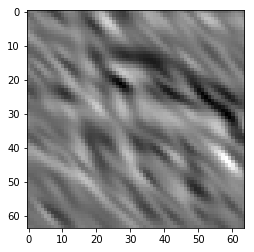

In [26]:
r = 0
x2 = np.sum(x/3, axis=3, keepdims=True)
dst = cv2.filter2D(x[r],-1,f[:,:,1])
plt.imshow(dst[:,:,1])
#plt.imshow(x[r])
print(y[r])

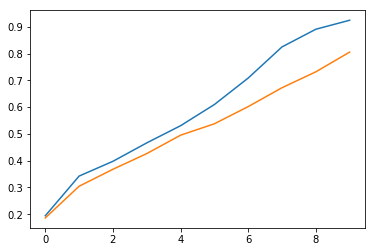

In [27]:
plt.plot(m2.history['acc'])
plt.plot(m.history['acc'])

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


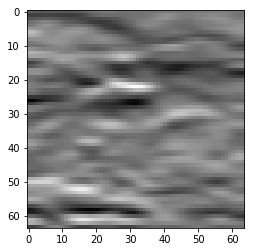

In [30]:
r = 4
#x2 = np.sum(x/3, axis=3, keepdims=True)
dst = cv2.filter2D(x[r],-1,f[:,:,0])
plt.imshow(dst[:,:,0])
#plt.imshow(x[r])
print(y[r])

#figur = np.empty([1,64,64,20], dtype='float32')
i = 2
z = 0
    



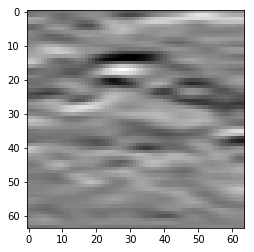

In [31]:
plt.imshow(figures[0,:,:,0])

In [32]:
figures.shape

(5000, 64, 64, 54)